## Методы современной прикладной статистики

### Семинар 11.

### Понижение размерности данных

### 3 мая 2018г.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# All imports

from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD, IncrementalPCA, KernelPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
from sklearn.manifold import TSNE, Isomap

from catboost import CatBoostClassifier

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Загрузка необходимых данных

In [3]:
mnist = fetch_mldata('MNIST original')

In [4]:
train_indices, val_indices = train_test_split(range(len(mnist.data)), test_size=0.25)

In [5]:
x_train, x_val = mnist.data[train_indices], mnist.data[val_indices]
y_train, y_val = mnist.target[train_indices], mnist.target[val_indices]

In [7]:
small_indices, _ = train_test_split(range(len(x_train)), train_size=5000)
x_train_small, y_train_small = x_train[small_indices], y_train[small_indices]

## PCA

In [65]:
%%time
pca_2d = IncrementalPCA(n_components=2)
pca_2d.fit(x_train)
x_train_pca_2d = pca_2d.transform(x_train)
x_val_pca_2d = pca_2d.transform(x_val)

CPU times: user 31 s, sys: 1.92 s, total: 32.9 s
Wall time: 15.5 s


In [89]:
from pylab import cm

def scatter_2d(x, y, figsize=(12, 8)):
    plt.figure(figsize=figsize)
    cmap = cm.get_cmap('Set1', 10)
    sc = plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap)
    plt.colorbar(sc)
    plt.show()

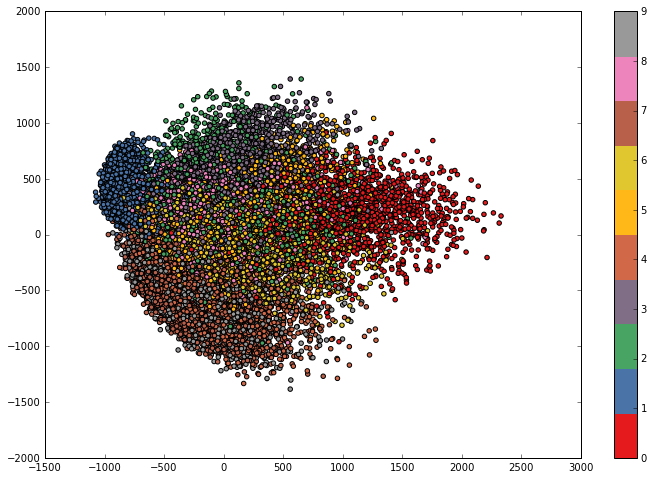

In [90]:
scatter_2d(x_val_pca_2d, y_val)

In [67]:
%%time
reduce_dim = 30
pca = IncrementalPCA(n_components=reduce_dim)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_val_pca = pca.transform(x_val)

CPU times: user 32.2 s, sys: 1.95 s, total: 34.1 s
Wall time: 16.5 s


Посмотрим на то, как хорошо можно классифицировать картинки на основе такого представления

In [27]:
%%time
cb_pca_clf = CatBoostClassifier(learning_rate=0.03, loss_function='MultiClass')
cb_pca_clf.fit(x_train_pca, y_train, eval_set=(x_val_pca, y_val), verbose=True)

Borders generated
0:	learn -2.197212581	test -2.197618602	bestTest -2.197618602		total: 6.74s	remaining: 56m 3s
1:	learn -2.11087753	test -2.111001838	bestTest -2.111001838		total: 7.71s	remaining: 32m
2:	learn -2.036272713	test -2.036304449	bestTest -2.036304449		total: 8.77s	remaining: 24m 12s
3:	learn -1.971182825	test -1.970962177	bestTest -1.970962177		total: 9.77s	remaining: 20m 11s
4:	learn -1.912441226	test -1.912341743	bestTest -1.912341743		total: 10.8s	remaining: 17m 53s
5:	learn -1.857682142	test -1.857346159	bestTest -1.857346159		total: 11.8s	remaining: 16m 13s
6:	learn -1.807456372	test -1.807384701	bestTest -1.807384701		total: 12.8s	remaining: 15m
7:	learn -1.759412682	test -1.759575353	bestTest -1.759575353		total: 13.8s	remaining: 14m 8s
8:	learn -1.715216797	test -1.715454744	bestTest -1.715454744		total: 14.8s	remaining: 13m 26s
9:	learn -1.673811446	test -1.674293884	bestTest -1.674293884		total: 15.8s	remaining: 12m 54s
10:	learn -1.635111374	test -1.63599636	bes

86:	learn -0.7110958415	test -0.7258831549	bestTest -0.7258831549		total: 1m 39s	remaining: 7m 52s
87:	learn -0.7061765216	test -0.721167417	bestTest -0.721167417		total: 1m 40s	remaining: 7m 51s
88:	learn -0.7019682931	test -0.7170630396	bestTest -0.7170630396		total: 1m 41s	remaining: 7m 50s
89:	learn -0.6978193996	test -0.7130384948	bestTest -0.7130384948		total: 1m 42s	remaining: 7m 48s
90:	learn -0.6936230263	test -0.708953192	bestTest -0.708953192		total: 1m 43s	remaining: 7m 47s
91:	learn -0.6878877771	test -0.7033636297	bestTest -0.7033636297		total: 1m 45s	remaining: 7m 47s
92:	learn -0.6821805536	test -0.6977264575	bestTest -0.6977264575		total: 1m 46s	remaining: 7m 45s
93:	learn -0.6781827245	test -0.6937809235	bestTest -0.6937809235		total: 1m 47s	remaining: 7m 44s
94:	learn -0.6740227802	test -0.6898306435	bestTest -0.6898306435		total: 1m 48s	remaining: 7m 42s
95:	learn -0.6686457648	test -0.6847901064	bestTest -0.6847901064		total: 1m 49s	remaining: 7m 41s
96:	learn -0.6

169:	learn -0.4594185741	test -0.4826605396	bestTest -0.4826605396		total: 3m 7s	remaining: 6m 4s
170:	learn -0.4576266874	test -0.4810364553	bestTest -0.4810364553		total: 3m 8s	remaining: 6m 3s
171:	learn -0.4556473847	test -0.4791546532	bestTest -0.4791546532		total: 3m 9s	remaining: 6m 1s
172:	learn -0.4539068538	test -0.4774819993	bestTest -0.4774819993		total: 3m 10s	remaining: 6m
173:	learn -0.4517110022	test -0.4753163684	bestTest -0.4753163684		total: 3m 11s	remaining: 5m 59s
174:	learn -0.4499480825	test -0.4735967019	bestTest -0.4735967019		total: 3m 12s	remaining: 5m 57s
175:	learn -0.4483945498	test -0.4720810362	bestTest -0.4720810362		total: 3m 13s	remaining: 5m 56s
176:	learn -0.4467675084	test -0.4705063052	bestTest -0.4705063052		total: 3m 14s	remaining: 5m 55s
177:	learn -0.4453068121	test -0.4691694968	bestTest -0.4691694968		total: 3m 15s	remaining: 5m 54s
178:	learn -0.4432832854	test -0.467229529	bestTest -0.467229529		total: 3m 16s	remaining: 5m 52s
179:	learn -

252:	learn -0.3461006524	test -0.3736018034	bestTest -0.3736018034		total: 4m 30s	remaining: 4m 24s
253:	learn -0.345413508	test -0.3729478304	bestTest -0.3729478304		total: 4m 31s	remaining: 4m 23s
254:	learn -0.3443950888	test -0.3719981179	bestTest -0.3719981179		total: 4m 32s	remaining: 4m 21s
255:	learn -0.3433250451	test -0.3709684734	bestTest -0.3709684734		total: 4m 33s	remaining: 4m 20s
256:	learn -0.3424506364	test -0.370118014	bestTest -0.370118014		total: 4m 34s	remaining: 4m 19s
257:	learn -0.3414860317	test -0.3691872464	bestTest -0.3691872464		total: 4m 35s	remaining: 4m 18s
258:	learn -0.3404657615	test -0.3682107174	bestTest -0.3682107174		total: 4m 36s	remaining: 4m 17s
259:	learn -0.339550633	test -0.3673534701	bestTest -0.3673534701		total: 4m 37s	remaining: 4m 16s
260:	learn -0.3388100647	test -0.3666740994	bestTest -0.3666740994		total: 4m 38s	remaining: 4m 15s
261:	learn -0.3381501803	test -0.3660608593	bestTest -0.3660608593		total: 4m 39s	remaining: 4m 13s
262:

335:	learn -0.2814261715	test -0.3113096559	bestTest -0.3113096559		total: 5m 52s	remaining: 2m 51s
336:	learn -0.2807271065	test -0.3106499907	bestTest -0.3106499907		total: 5m 53s	remaining: 2m 50s
337:	learn -0.2801909399	test -0.3101730959	bestTest -0.3101730959		total: 5m 54s	remaining: 2m 49s
338:	learn -0.2795374194	test -0.3095952845	bestTest -0.3095952845		total: 5m 55s	remaining: 2m 48s
339:	learn -0.2790528072	test -0.3091683277	bestTest -0.3091683277		total: 5m 56s	remaining: 2m 47s
340:	learn -0.2784714274	test -0.3086169211	bestTest -0.3086169211		total: 5m 57s	remaining: 2m 46s
341:	learn -0.277844182	test -0.3080135891	bestTest -0.3080135891		total: 5m 58s	remaining: 2m 45s
342:	learn -0.2772126709	test -0.3074396866	bestTest -0.3074396866		total: 5m 59s	remaining: 2m 44s
343:	learn -0.276719221	test -0.3069841488	bestTest -0.3069841488		total: 6m	remaining: 2m 43s
344:	learn -0.2761106284	test -0.3064007918	bestTest -0.3064007918		total: 6m	remaining: 2m 42s
345:	learn

418:	learn -0.2400052043	test -0.2721650061	bestTest -0.2721650061		total: 7m 13s	remaining: 1m 23s
419:	learn -0.2395901323	test -0.2717754236	bestTest -0.2717754236		total: 7m 14s	remaining: 1m 22s
420:	learn -0.2393229032	test -0.2715359452	bestTest -0.2715359452		total: 7m 15s	remaining: 1m 21s
421:	learn -0.2388769428	test -0.2710992559	bestTest -0.2710992559		total: 7m 16s	remaining: 1m 20s
422:	learn -0.2383637255	test -0.2706042812	bestTest -0.2706042812		total: 7m 17s	remaining: 1m 19s
423:	learn -0.2378545441	test -0.2701170449	bestTest -0.2701170449		total: 7m 18s	remaining: 1m 18s
424:	learn -0.2375549578	test -0.2698240081	bestTest -0.2698240081		total: 7m 19s	remaining: 1m 17s
425:	learn -0.2371534632	test -0.2694393953	bestTest -0.2694393953		total: 7m 20s	remaining: 1m 16s
426:	learn -0.2367217737	test -0.2690444415	bestTest -0.2690444415		total: 7m 21s	remaining: 1m 15s
427:	learn -0.2361873259	test -0.2685224624	bestTest -0.2685224624		total: 7m 21s	remaining: 1m 14s


In [57]:
def show_model_stats(model, x, y):
    y_pred = model.predict(x)
    print "Accuracy score:", accuracy_score(y, y_pred)
    print "Confusion matrix:"
    print confusion_matrix(y, y_pred)
    
    y_p_pred = model.predict_proba(x)
    print "Log loss: ", log_loss(y, y_p_pred)

In [32]:
show_model_stats(cb_pca_clf, x_val_pca, y_val)

Accuracy score: 0.9346857142857142
Confusion matrix:
[[1716    0    7    6    5    9    9    2   14    3]
 [   0 1911   10    7    2    5    2    2    9    3]
 [  14   13 1618   32   23    3   18   16   32    7]
 [   3    6   21 1654    0   49    4   22   51   19]
 [   1    5    5    3 1570    1   17    2   11   66]
 [  13    2    5   33   13 1488   16    3   13    8]
 [  13   10    5    0    7   19 1681    0    6    0]
 [   1   16   25    2    9    2    0 1656    9   36]
 [   5   19   20   32   11   39   10    3 1504   26]
 [   8    7    8   18   66    5    2   41   18 1559]]
Log loss:  0.2450459159579231


## LDA

In [61]:
%%time
lda_2d = LDA(n_components=2)
lda_2d.fit(x_train, y_train)
x_train_lda_2d = lda_2d.transform(x_train)
x_val_lda_2d = lda_2d.transform(x_val)

CPU times: user 26.8 s, sys: 1.54 s, total: 28.4 s
Wall time: 13.1 s


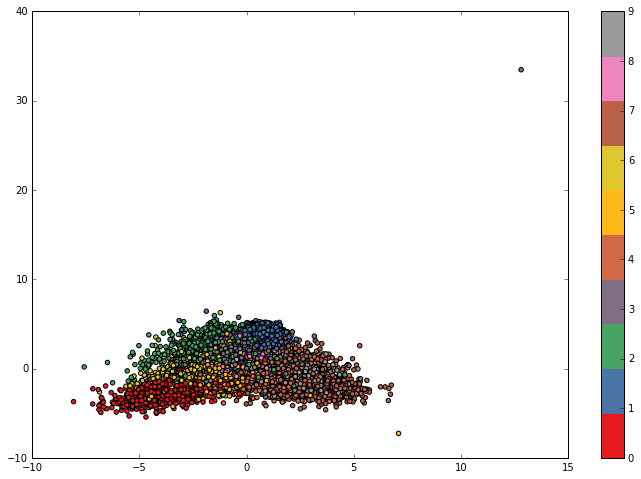

In [91]:
scatter_2d(x_val_lda_2d, y_val)

Стоит обратить внимание на то, что LDA производит уменьшение размерности с учетом классов рассматриваемых объектов.

In [63]:
%%time
reduce_dim = 30
lda = LDA(n_components=reduce_dim)
lda.fit(x_train, y_train)
x_train_lda = lda.transform(x_train)
x_val_lda = lda.transform(x_val)

CPU times: user 27.3 s, sys: 1.58 s, total: 28.9 s
Wall time: 12.8 s


In [64]:
x_train_lda.shape

(52500, 9)

Размерность вложения оказалась равна 9. LDA может уменьшать размерность лишь до размерностей $< n\_classes$. Это надо иметь ввиду.

In [95]:
%%time
cb_lda_clf = CatBoostClassifier(learning_rate=0.03, loss_function='MultiClass')
cb_lda_clf.fit(x_train_lda, y_train, eval_set=(x_val_lda, y_val), verbose=True)

Borders generated
0:	learn -2.15692667	test -2.159726247	bestTest -2.159726247		total: 2.73s	remaining: 22m 40s
1:	learn -2.034224624	test -2.038806768	bestTest -2.038806768		total: 3.77s	remaining: 15m 38s
2:	learn -1.932538583	test -1.938825337	bestTest -1.938825337		total: 4.67s	remaining: 12m 54s
3:	learn -1.844565004	test -1.852064501	bestTest -1.852064501		total: 5.47s	remaining: 11m 18s
4:	learn -1.766351593	test -1.775320079	bestTest -1.775320079		total: 6.28s	remaining: 10m 21s
5:	learn -1.699295901	test -1.708956467	bestTest -1.708956467		total: 7.13s	remaining: 9m 47s
6:	learn -1.636045178	test -1.646539571	bestTest -1.646539571		total: 7.91s	remaining: 9m 17s
7:	learn -1.579976234	test -1.591093625	bestTest -1.591093625		total: 8.7s	remaining: 8m 54s
8:	learn -1.529756089	test -1.541646414	bestTest -1.541646414		total: 9.45s	remaining: 8m 35s
9:	learn -1.476864733	test -1.489367305	bestTest -1.489367305		total: 10.2s	remaining: 8m 19s
10:	learn -1.432183707	test -1.44522791

85:	learn -0.4675100425	test -0.492908594	bestTest -0.492908594		total: 1m 18s	remaining: 6m 16s
86:	learn -0.4642302286	test -0.4897803008	bestTest -0.4897803008		total: 1m 19s	remaining: 6m 15s
87:	learn -0.4607893401	test -0.4864754683	bestTest -0.4864754683		total: 1m 20s	remaining: 6m 15s
88:	learn -0.4576526415	test -0.4834093023	bestTest -0.4834093023		total: 1m 21s	remaining: 6m 16s
89:	learn -0.4546130184	test -0.4804239278	bestTest -0.4804239278		total: 1m 22s	remaining: 6m 16s
90:	learn -0.4517305779	test -0.4776029821	bestTest -0.4776029821		total: 1m 23s	remaining: 6m 15s
91:	learn -0.4486811664	test -0.4746829969	bestTest -0.4746829969		total: 1m 24s	remaining: 6m 14s
92:	learn -0.4457963592	test -0.4718137537	bestTest -0.4718137537		total: 1m 25s	remaining: 6m 12s
93:	learn -0.442979641	test -0.4690111064	bestTest -0.4690111064		total: 1m 26s	remaining: 6m 11s
94:	learn -0.4400976378	test -0.4662317046	bestTest -0.4662317046		total: 1m 26s	remaining: 6m 10s
95:	learn -0.

168:	learn -0.3366858812	test -0.3680803468	bestTest -0.3680803468		total: 2m 37s	remaining: 5m 7s
169:	learn -0.3360477294	test -0.3674774629	bestTest -0.3674774629		total: 2m 37s	remaining: 5m 6s
170:	learn -0.3352217986	test -0.3667531617	bestTest -0.3667531617		total: 2m 38s	remaining: 5m 5s
171:	learn -0.3345536012	test -0.3661707459	bestTest -0.3661707459		total: 2m 39s	remaining: 5m 4s
172:	learn -0.3338634198	test -0.3655151439	bestTest -0.3655151439		total: 2m 40s	remaining: 5m 2s
173:	learn -0.3331341367	test -0.3648654438	bestTest -0.3648654438		total: 2m 40s	remaining: 5m 1s
174:	learn -0.3325491146	test -0.364297332	bestTest -0.364297332		total: 2m 41s	remaining: 5m
175:	learn -0.3317945662	test -0.3635973522	bestTest -0.3635973522		total: 2m 42s	remaining: 4m 59s
176:	learn -0.3311866211	test -0.3630164548	bestTest -0.3630164548		total: 2m 43s	remaining: 4m 58s
177:	learn -0.3303667875	test -0.3622828463	bestTest -0.3622828463		total: 2m 44s	remaining: 4m 57s
178:	learn -

251:	learn -0.2960163217	test -0.3322637225	bestTest -0.3322637225		total: 3m 42s	remaining: 3m 38s
252:	learn -0.2956295121	test -0.3319366753	bestTest -0.3319366753		total: 3m 43s	remaining: 3m 37s
253:	learn -0.2953870477	test -0.3317401907	bestTest -0.3317401907		total: 3m 44s	remaining: 3m 37s
254:	learn -0.2950833772	test -0.3314856553	bestTest -0.3314856553		total: 3m 45s	remaining: 3m 36s
255:	learn -0.2947541898	test -0.3312098206	bestTest -0.3312098206		total: 3m 46s	remaining: 3m 35s
256:	learn -0.2944083092	test -0.3309457253	bestTest -0.3309457253		total: 3m 47s	remaining: 3m 35s
257:	learn -0.2941076857	test -0.3306583321	bestTest -0.3306583321		total: 3m 48s	remaining: 3m 34s
258:	learn -0.2938331986	test -0.3304141815	bestTest -0.3304141815		total: 3m 49s	remaining: 3m 33s
259:	learn -0.2934863403	test -0.330130854	bestTest -0.330130854		total: 3m 50s	remaining: 3m 32s
260:	learn -0.2931366098	test -0.3298744732	bestTest -0.3298744732		total: 3m 51s	remaining: 3m 31s
26

334:	learn -0.2742742208	test -0.3147902135	bestTest -0.3147902135		total: 4m 54s	remaining: 2m 25s
335:	learn -0.2740747877	test -0.3146408602	bestTest -0.3146408602		total: 4m 55s	remaining: 2m 24s
336:	learn -0.2739193448	test -0.3145008719	bestTest -0.3145008719		total: 4m 55s	remaining: 2m 23s
337:	learn -0.2737410181	test -0.314358422	bestTest -0.314358422		total: 4m 56s	remaining: 2m 22s
338:	learn -0.2734817059	test -0.314193876	bestTest -0.314193876		total: 4m 57s	remaining: 2m 21s
339:	learn -0.273217373	test -0.3139960153	bestTest -0.3139960153		total: 4m 58s	remaining: 2m 20s
340:	learn -0.273065098	test -0.3138550857	bestTest -0.3138550857		total: 4m 58s	remaining: 2m 19s
341:	learn -0.2728903879	test -0.3137133758	bestTest -0.3137133758		total: 4m 59s	remaining: 2m 18s
342:	learn -0.2727385857	test -0.3136043933	bestTest -0.3136043933		total: 5m	remaining: 2m 17s
343:	learn -0.2725278078	test -0.3134221006	bestTest -0.3134221006		total: 5m 1s	remaining: 2m 16s
344:	learn 

417:	learn -0.2590808076	test -0.303562308	bestTest -0.303562308		total: 6m 2s	remaining: 1m 11s
418:	learn -0.2588907027	test -0.3034188653	bestTest -0.3034188653		total: 6m 3s	remaining: 1m 10s
419:	learn -0.2586394318	test -0.3032381032	bestTest -0.3032381032		total: 6m 4s	remaining: 1m 9s
420:	learn -0.2584566902	test -0.3031113492	bestTest -0.3031113492		total: 6m 5s	remaining: 1m 8s
421:	learn -0.2582932166	test -0.303001953	bestTest -0.303001953		total: 6m 5s	remaining: 1m 7s
422:	learn -0.2581743503	test -0.3029235777	bestTest -0.3029235777		total: 6m 6s	remaining: 1m 6s
423:	learn -0.2580427343	test -0.3028146796	bestTest -0.3028146796		total: 6m 7s	remaining: 1m 5s
424:	learn -0.2579348488	test -0.3027440136	bestTest -0.3027440136		total: 6m 8s	remaining: 1m 5s
425:	learn -0.2577729203	test -0.3026537355	bestTest -0.3026537355		total: 6m 9s	remaining: 1m 4s
426:	learn -0.2576663318	test -0.3025741232	bestTest -0.3025741232		total: 6m 10s	remaining: 1m 3s
427:	learn -0.2575679

In [97]:
show_model_stats(cb_lda_clf, x_val_lda, y_val)

Accuracy score: 0.9048571428571428
Confusion matrix:
[[1609    0    8    5    2   24   16    4   10    2]
 [   1 1933   17    4    1    5    2    2   39    4]
 [  17   10 1549   45   21    8   34   17   27   13]
 [   4   11   47 1592    1   79    5   26   43   11]
 [   2    7   10    1 1520    4   19    7   19   82]
 [  18    4   12   60   10 1382   25   13   70   12]
 [  14    2   21    1   17   34 1630    0   10    0]
 [   2   17   21   13   20    7    0 1689    5   54]
 [  10   35   18   65   19   72   17   10 1422   31]
 [  14    1    4   19   86    9    2   58   17 1509]]
Log loss:  0.29632357742033294


## Kernel PCA

Для начала надо выбрать хоть сколько-нибудь адекватную ширину ядра

In [51]:
np.max(mnist.data)

255

PCA с ядрами считается относительно медленно и требует как минимум $O(n\_samples^2)$ памяти, поэтому будем запускать его с небольшой подвыборкой из train

In [98]:
%%time
gamma_const = 1.0 / np.max(mnist.data) ** 2 / 28 ** 2
kpca_2d = KernelPCA(n_components=2, kernel='rbf', gamma=2.5 * gamma_const)
kpca_2d.fit(x_train_small)
x_train_kpca_2d = kpca_2d.transform(x_train)
x_val_kpca_2d = kpca_2d.transform(x_val)

CPU times: user 1min 10s, sys: 10.5 s, total: 1min 20s
Wall time: 55.5 s


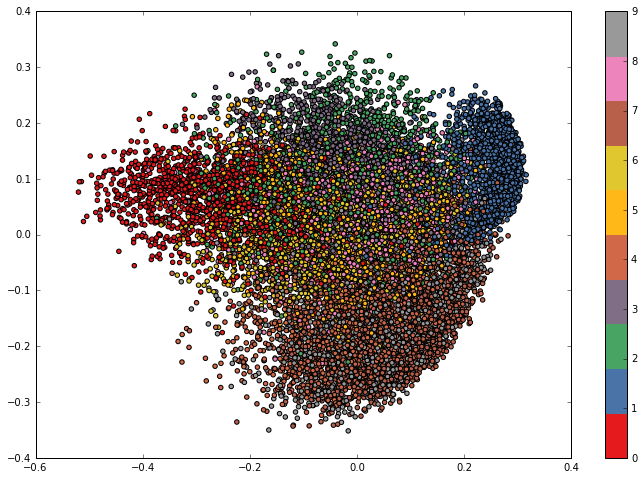

In [99]:
scatter_2d(x_val_kpca_2d, y_val)

In [48]:
%%time
reduce_dim = 30
kpca = KernelPCA(n_components=reduce_dim, kernel='rbf', gamma=0.0000005)
kpca.fit(x_train_small)
x_train_kpca = kpca.transform(x_train)
x_val_kpca = kpca.transform(x_val)

CPU times: user 1min 38s, sys: 8.69 s, total: 1min 46s
Wall time: 1min 5s


In [49]:
%%time
cb_kpca_clf = CatBoostClassifier(learning_rate=0.03, loss_function='MultiClass')
cb_kpca_clf.fit(x_train_kpca, y_train, eval_set=(x_val_kpca, y_val), verbose=True)

Borders generated
0:	learn -2.197078339	test -2.196992766	bestTest -2.196992766		total: 6.23s	remaining: 51m 48s
1:	learn -2.107002842	test -2.10632612	bestTest -2.10632612		total: 7.19s	remaining: 29m 49s
2:	learn -2.02978219	test -2.0294693	bestTest -2.0294693		total: 8.17s	remaining: 22m 33s
3:	learn -1.964575202	test -1.964659552	bestTest -1.964659552		total: 9.13s	remaining: 18m 52s
4:	learn -1.899968653	test -1.900315657	bestTest -1.900315657		total: 10.1s	remaining: 16m 39s
5:	learn -1.841897926	test -1.842278876	bestTest -1.842278876		total: 11.1s	remaining: 15m 12s
6:	learn -1.793124301	test -1.793461672	bestTest -1.793461672		total: 12.1s	remaining: 14m 9s
7:	learn -1.746982191	test -1.746956818	bestTest -1.746956818		total: 13.2s	remaining: 13m 31s
8:	learn -1.706416095	test -1.706277696	bestTest -1.706277696		total: 14.2s	remaining: 12m 54s
9:	learn -1.665044503	test -1.664778928	bestTest -1.664778928		total: 15.3s	remaining: 12m 28s
10:	learn -1.62717176	test -1.626483541	

KeyboardInterrupt: 

In [ ]:
show_model_stats(cb_kpca_clf, x_val_kpca, y_val)

## t-SNE

t-SNE вычислительно затратен, поэтому запустим его лишь на малой части данных

In [13]:
%%time
tsne = TSNE(n_components=2)
# tsne.fit(x_train_small)
x_tsne = tsne.fit_transform(x_train_small)

AttributeError: 'TSNE' object has no attribute 'transform'

In [68]:
# x_tsne = tsne.embedding_

У t-SNE нет метода transform. То есть нельзя настроить t-SNE на одних данных, а использовать на других. Это, в общем-то, и так ясно из процедуры построения t-SNE вложения.

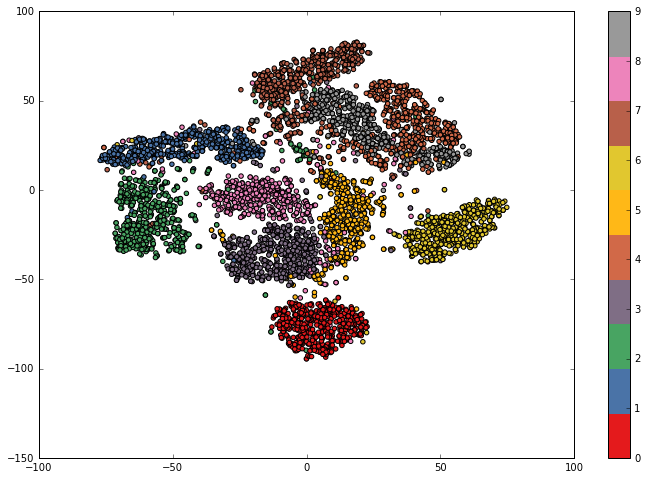

In [93]:
scatter_2d(tsne.embedding_, y_train_small)

Посмотрим на качество классификации. Правда придется поделить на train и validation и поработать лишь с теми данными, на которых t-SNE строился.

In [70]:
x_tsne_train, x_tsne_val, y_tsne_train, y_tsne_val = train_test_split(x_tsne, y_train_small, test_size=0.25)

In [71]:
%%time
cb_tsne_clf = CatBoostClassifier(learning_rate=0.03, loss_function='MultiClass')
cb_tsne_clf.fit(x_tsne_train, y_tsne_train, eval_set=(x_tsne_val, y_tsne_val), verbose=True)

Borders generated
0:	learn -2.161431308	test -2.158422012	bestTest -2.158422012		total: 106ms	remaining: 52.7s
1:	learn -2.048132184	test -2.042113912	bestTest -2.042113912		total: 175ms	remaining: 43.5s
2:	learn -1.950215058	test -1.943888744	bestTest -1.943888744		total: 247ms	remaining: 40.9s
3:	learn -1.854931394	test -1.845699435	bestTest -1.845699435		total: 316ms	remaining: 39.1s
4:	learn -1.776105986	test -1.766234237	bestTest -1.766234237		total: 381ms	remaining: 37.7s
5:	learn -1.699908176	test -1.689939209	bestTest -1.689939209		total: 455ms	remaining: 37.5s
6:	learn -1.62962789	test -1.618294424	bestTest -1.618294424		total: 539ms	remaining: 38s
7:	learn -1.566644878	test -1.553927209	bestTest -1.553927209		total: 613ms	remaining: 37.7s
8:	learn -1.512020577	test -1.498874394	bestTest -1.498874394		total: 692ms	remaining: 37.8s
9:	learn -1.457826509	test -1.44344731	bestTest -1.44344731		total: 752ms	remaining: 36.8s
10:	learn -1.410250547	test -1.395065161	bestTest -1.3950

88:	learn -0.4810220898	test -0.4617120849	bestTest -0.4617120849		total: 6.07s	remaining: 28s
89:	learn -0.4783785285	test -0.4591335473	bestTest -0.4591335473		total: 6.15s	remaining: 28s
90:	learn -0.4763972544	test -0.4571760643	bestTest -0.4571760643		total: 6.22s	remaining: 27.9s
91:	learn -0.4741450734	test -0.4551015266	bestTest -0.4551015266		total: 6.3s	remaining: 27.9s
92:	learn -0.4718851007	test -0.4528929232	bestTest -0.4528929232		total: 6.38s	remaining: 27.9s
93:	learn -0.4697322243	test -0.4507333203	bestTest -0.4507333203		total: 6.46s	remaining: 27.9s
94:	learn -0.4670864724	test -0.4480363732	bestTest -0.4480363732		total: 6.54s	remaining: 27.9s
95:	learn -0.4644071278	test -0.4454369232	bestTest -0.4454369232		total: 6.62s	remaining: 27.9s
96:	learn -0.4621028588	test -0.4432380596	bestTest -0.4432380596		total: 6.69s	remaining: 27.8s
97:	learn -0.4601325664	test -0.4414864859	bestTest -0.4414864859		total: 6.75s	remaining: 27.7s
98:	learn -0.4576906193	test -0.439

175:	learn -0.3718425557	test -0.3603562077	bestTest -0.3603562077		total: 12.9s	remaining: 23.7s
176:	learn -0.3713011167	test -0.3599236039	bestTest -0.3599236039		total: 12.9s	remaining: 23.6s
177:	learn -0.3706869109	test -0.3595044059	bestTest -0.3595044059		total: 13s	remaining: 23.6s
178:	learn -0.3702082679	test -0.359249904	bestTest -0.359249904		total: 13.1s	remaining: 23.5s
179:	learn -0.3695062845	test -0.358726338	bestTest -0.358726338		total: 13.2s	remaining: 23.4s
180:	learn -0.3690144464	test -0.3582723933	bestTest -0.3582723933		total: 13.3s	remaining: 23.4s
181:	learn -0.3683420905	test -0.3577106638	bestTest -0.3577106638		total: 13.3s	remaining: 23.3s
182:	learn -0.3675995762	test -0.3572225583	bestTest -0.3572225583		total: 13.4s	remaining: 23.2s
183:	learn -0.3670430822	test -0.3567596241	bestTest -0.3567596241		total: 13.5s	remaining: 23.2s
184:	learn -0.3666311282	test -0.3563972292	bestTest -0.3563972292		total: 13.6s	remaining: 23.1s
185:	learn -0.3661080893	t

262:	learn -0.3353001081	test -0.3333525073	bestTest -0.3333525073		total: 19.4s	remaining: 17.5s
263:	learn -0.3349364651	test -0.333047785	bestTest -0.333047785		total: 19.5s	remaining: 17.4s
264:	learn -0.3347491432	test -0.3329502464	bestTest -0.3329502464		total: 19.6s	remaining: 17.4s
265:	learn -0.3345088197	test -0.3327621048	bestTest -0.3327621048		total: 19.6s	remaining: 17.3s
266:	learn -0.3341193639	test -0.3324589502	bestTest -0.3324589502		total: 19.7s	remaining: 17.2s
267:	learn -0.3338561985	test -0.3322035914	bestTest -0.3322035914		total: 19.7s	remaining: 17.1s
268:	learn -0.3334955795	test -0.3319839428	bestTest -0.3319839428		total: 19.8s	remaining: 17s
269:	learn -0.3332241565	test -0.3318172227	bestTest -0.3318172227		total: 19.9s	remaining: 16.9s
270:	learn -0.3328869155	test -0.3315999526	bestTest -0.3315999526		total: 20s	remaining: 16.9s
271:	learn -0.3324389777	test -0.331338228	bestTest -0.331338228		total: 20s	remaining: 16.8s
272:	learn -0.332016901	test -

347:	learn -0.3112693933	test -0.3179811803	bestTest -0.3179811803		total: 25.7s	remaining: 11.2s
348:	learn -0.3110299594	test -0.3178658669	bestTest -0.3178658669		total: 25.8s	remaining: 11.2s
349:	learn -0.3107692124	test -0.3176512501	bestTest -0.3176512501		total: 25.9s	remaining: 11.1s
350:	learn -0.3104524267	test -0.317476911	bestTest -0.317476911		total: 26s	remaining: 11s
351:	learn -0.3099914453	test -0.3170585115	bestTest -0.3170585115		total: 26s	remaining: 10.9s
352:	learn -0.3097938449	test -0.3170164376	bestTest -0.3170164376		total: 26.1s	remaining: 10.9s
353:	learn -0.3096026308	test -0.3169583223	bestTest -0.3169583223		total: 26.1s	remaining: 10.8s
354:	learn -0.3093118949	test -0.3168133389	bestTest -0.3168133389		total: 26.2s	remaining: 10.7s
355:	learn -0.3091070581	test -0.3167438117	bestTest -0.3167438117		total: 26.2s	remaining: 10.6s
356:	learn -0.3088768253	test -0.3165920803	bestTest -0.3165920803		total: 26.3s	remaining: 10.5s
357:	learn -0.3086235338	tes

432:	learn -0.2926170047	test -0.3074202106	bestTest -0.3074202106		total: 32.1s	remaining: 4.97s
433:	learn -0.2923413265	test -0.3073275333	bestTest -0.3073275333		total: 32.2s	remaining: 4.9s
434:	learn -0.292076786	test -0.3071133345	bestTest -0.3071133345		total: 32.3s	remaining: 4.83s
435:	learn -0.2918067413	test -0.306865103	bestTest -0.306865103		total: 32.4s	remaining: 4.75s
436:	learn -0.2915262139	test -0.3067593906	bestTest -0.3067593906		total: 32.5s	remaining: 4.68s
437:	learn -0.2912934782	test -0.3065396938	bestTest -0.3065396938		total: 32.5s	remaining: 4.61s
438:	learn -0.2911508252	test -0.3064979912	bestTest -0.3064979912		total: 32.6s	remaining: 4.53s
439:	learn -0.290868356	test -0.3062544481	bestTest -0.3062544481		total: 32.7s	remaining: 4.46s
440:	learn -0.2907548762	test -0.3062105419	bestTest -0.3062105419		total: 32.8s	remaining: 4.38s
441:	learn -0.2905766917	test -0.3061028453	bestTest -0.3061028453		total: 32.9s	remaining: 4.31s
442:	learn -0.2904237863	

In [72]:
show_model_stats(cb_tsne_clf, x_tsne_val, y_tsne_val)

Accuracy score: 0.9296
Confusion matrix:
[[131   0   1   0   0   0   0   0   0   0]
 [  0 154   3   0   0   0   0   0   0   0]
 [  2   0 130   1   0   1   1   1   0   0]
 [  0   3   1 128   3   1   0   0   2   0]
 [  0   3   0   0  97   0   1   1   2   9]
 [  0   0   0   2   1 100   0   0   0   1]
 [  1   0   0   0   0   1 110   0   0   0]
 [  0   0   1   0   2   0   0 117   0   4]
 [  0   5   4   3   4   9   0   2  87   1]
 [  0   0   1   0   7   1   0   2   0 108]]
Log loss:  0.3008102173565547


Про производительность методов t-SNE, Isomap, LLE можно почитать тут http://scikit-learn.org/stable/modules/manifold.html

## Isomap

In [53]:
%%time
isomap = Isomap(n_neighbors=4, n_components=2)
isomap.fit(x_train_small)
x_train_isomap = isomap.transform(x_train)
x_val_isomap = isomap.transform(x_val)

CPU times: user 8min 15s, sys: 15.5 s, total: 8min 31s
Wall time: 8min 50s


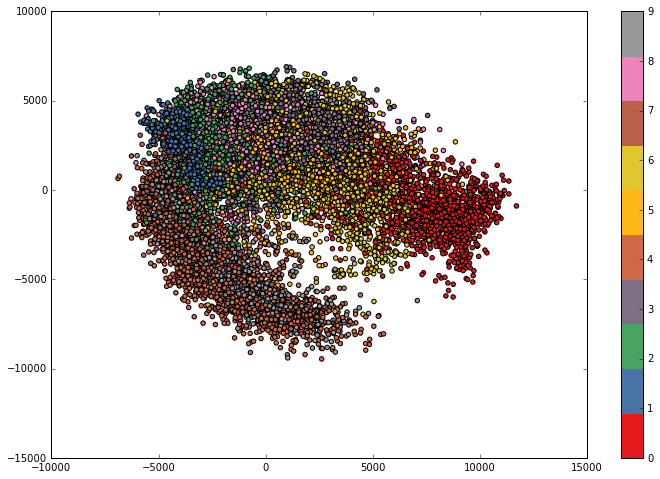

In [94]:
scatter_2d(x_val_isomap, y_val)